In [235]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import scipy.stats as stat
import numpy as np
%matplotlib inline
from sklearn.model_selection import cross_validate
import re
import warnings
warnings.filterwarnings("ignore")

In [236]:
data = pd.read_csv("./raw_data/smallDS.csv")

In [237]:
data.head(20)

,Name,Price,Drive-type,Fuel-type,Transmission,Engine,Mileague
0,2023 BMW 540 i xDrive,"$72,320",All-wheel Drive,Gasoline,Automatic,3.0L I6 24V GDI DOHC Turbo,9 mi.
1,2014 BMW i3 Base w/Range Extender,"$11,991",Rear-wheel Drive,1-Speed Automatic,Electric,WBY1Z4C56EV273235,\n\nKeyless StartNavigation System\n\n
2,2021 Volkswagen Jetta 1.4T R-Line,"$24,592",Front-wheel Drive,Gasoline,8-Speed Automatic,1.4L I4 16V GDI DOHC Turbo,"20,580 mi."
3,2012 Volkswagen Passat 2.5 SE,"$9,991",Front-wheel Drive,Gasoline,6-Speed Automatic,2.5L I5 20V MPFI DOHC,"99,111 mi."
4,2017 Mercedes-Benz E-Class E 300 4MATIC,"$27,491",All-wheel Drive,Gasoline,9-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,"49,497 mi."
5,2021 Volkswagen ID.4 Pro,"$31,991",Rear-wheel Drive,1-Speed Automatic,Electric,WVGRMPE23MP052584,\n\nAdaptive Cruise ControlHeated SeatsHeated ...
6,2019 Kia Sportage LX,"$18,591",All-wheel Drive,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"37,653 mi."
7,2017 Volkswagen e-Golf SEL Premium,"$19,591",Front-wheel Drive,1-Speed Automatic,Electric,WVWPR7AU6HW954436,\n\nHeated SeatsKeyless StartNavigation System...
8,2022 Volkswagen Golf R 2.0T,"$52,991",All-wheel Drive,Gasoline,8-Speed Automatic with Tiptronic,2.0L,"7,831 mi."
9,2018 Volkswagen Atlas 3.6L SE,"$18,591",Front-wheel Drive,Gasoline,8-Speed Automatic,3.6L V6 24V GDI DOHC,"90,528 mi."


## Dataset cleaning

In [238]:
# Áp dụng phương thức strip() cho từng phần tử trong DataFrame
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Loại bỏ các kí tự đặc biệt khác chữ cái, số, dấu chấm, dấu gạch nối và dấu cách trên tất cả các cột
data = data.replace(r'[^a-zA-Z0-9_\- .]', '', regex=True)
# Xóa các giá trị không chứa dấu cách nào của cột "Engine"
data.loc[~data['Engine'].str.contains(r'\s'), 'Engine'] = 'NoInfo'

data['Fuel-type'] = data['Fuel-type'].fillna('NoInfo')

# Chỉ giữ lại giá trị số trong cột 'Price'
data['Price'] = data['Price'].str.replace(r'[^0-9.]', '', regex=True)
data['Price'] = data['Price'].replace('', np.nan)
# Chỉ giữ lại giá trị số trong cột 'Mileague'
data['Mileague'] = data['Mileague'].str.replace(r'\D', '', regex=True)
data['Mileague'] = data['Mileague'].replace('', np.nan)


# Thay thế '4WD' bằng 'Four-wheel Drive' và 'AWD' bằng 'All-wheel Drive' trong cột 'Drive-type'
data['Drive-type'] = data['Drive-type'].replace({'4WD': 'Four-wheel Drive', 'AWD': 'All-wheel Drive', 'FWD': 'Front-wheel Drive'})
# Tạo danh sách các giá trị hợp lệ
valid_values = ['Four-wheel Drive', 'All-wheel Drive', 'Rear-wheel Drive', 'Front-wheel Drive']

invalid_rows = ~data['Drive-type'].isin(valid_values)
data.loc[invalid_rows, 'Drive-type'] = "NoInfo"

# Xuất dữ liệu đã làm sạch thành file CSV mới
data.to_csv('./cleaned_data/cleaned_smallDS.csv', index=False)

In [239]:
data['Price'] = data['Price'].replace('', np.nan)
data['Mileague'] = data['Mileague'].replace('', np.nan)
data = data.dropna(subset=['Price'])
data = data.dropna(subset=['Mileague'])
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 964
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          860 non-null    object
 1   Price         860 non-null    object
 2   Drive-type    860 non-null    object
 3   Fuel-type     860 non-null    object
 4   Transmission  860 non-null    object
 5   Engine        860 non-null    object
 6   Mileague      860 non-null    object
dtypes: object(7)
memory usage: 53.8+ KB


,Name,Price,Drive-type,Fuel-type,Transmission,Engine,Mileague
0,2023 BMW 540 i xDrive,72320,All-wheel Drive,Gasoline,Automatic,3.0L I6 24V GDI DOHC Turbo,9
2,2021 Volkswagen Jetta 1.4T R-Line,24592,Front-wheel Drive,Gasoline,8-Speed Automatic,1.4L I4 16V GDI DOHC Turbo,20580
3,2012 Volkswagen Passat 2.5 SE,9991,Front-wheel Drive,Gasoline,6-Speed Automatic,2.5L I5 20V MPFI DOHC,99111
4,2017 Mercedes-Benz E-Class E 300 4MATIC,27491,All-wheel Drive,Gasoline,9-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,49497
6,2019 Kia Sportage LX,18591,All-wheel Drive,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,37653
8,2022 Volkswagen Golf R 2.0T,52991,All-wheel Drive,Gasoline,8-Speed Automatic with Tiptronic,NoInfo,7831
9,2018 Volkswagen Atlas 3.6L SE,18591,Front-wheel Drive,Gasoline,8-Speed Automatic,3.6L V6 24V GDI DOHC,90528
10,2022 Volkswagen Golf GTI 2.0T Autobahn,36491,Front-wheel Drive,Gasoline,6-Speed Manual,2.0L I4 16V GDI DOHC Turbo,12408
11,2015 Volkswagen Tiguan Auto S,11491,Front-wheel Drive,Gasoline,6-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,99168
12,2020 Volkswagen Golf GTI 2.0T Autobahn,32491,Front-wheel Drive,Gasoline,7-Speed Automatic with Auto-Shift,2.0L I4 16V GDI DOHC Turbo,8574


## Feature Extracting: New Features

In [240]:
# Tạo hai cột mới 'Year' và 'Brand'
data['Year'] = data['Name'].str.extract(r'(\d{4})')  # Trích xuất năm (4 chữ số) từ cột 'Name'
# Trích xuất brand từ cột 'Name' và chỉ lấy duy nhất 1 từ liền sau phần năm
data['Brand'] = data['Name'].str.extract(r'\d+\s(\w+)', expand=False)

# Tạo cột mới 'n-Speed' và gán giá trị từ chuỗi số-Speed trong cột 'Transmission'
data['n-Speed'] = data['Transmission'].apply(lambda x: re.findall(r'\d+-Speed', str(x))[0] if re.findall(r'\d+-Speed', str(x)) else 'NoInfo')

In [241]:
# Tạo cột "Automation" và gán giá trị dựa trên từ khóa trong cột "Transmission"
data['Automation'] = 'NoInfo'  # Gán giá trị mặc định là 'NoInfo'

# Kiểm tra từ khóa 'Automatic' trong cột "Transmission" và gán giá trị 'Automatic' cho cột "Automation"
data.loc[data['Transmission'].str.contains('Automatic', case=False), 'Automation'] = 'Automatic'

# Kiểm tra từ khóa 'Manual' trong cột "Transmission" và gán giá trị 'Manual' cho cột "Automation"
data.loc[data['Transmission'].str.contains('Manual', case=False), 'Automation'] = 'Manual'

# Tạo cột mới 'CylinCapa' và trích xuất giá trị số thực từ cột 'Engine'
data['CylinCapa'] = data['Engine'].str.extract(r'(\d+\.\d+)L', expand=False)
data['CylinCapa'] = data['CylinCapa'].fillna('NoInfo')


# Tạo cột mới 'CylinType' và kiểm tra từ có định dạng như kiểu xếp xilanh (chữ + số) trong cột 'Engine'
data['CylinType'] = data['Engine'].str.extract(r'([A-Z]\d)', expand=False)
# Điền giá trị 'NoInfo' cho các hàng không phù hợp
data['CylinType'] = data['CylinType'].fillna('NoInfo')


# Tạo cột mới 'Vans' và kiểm tra từ từ có định dạng như số van (số + V) trong cột 'Engine'
data['Vans'] = data['Engine'].str.extract(r'(\d+V)')
# Điền giá trị 'NoInfo' cho các hàng không phù hợp
data['Vans'] = data['Vans'].fillna('NoInfo')

# Tạo cột mới 'Injection' và kiểm tra từ đầu tiên trong cột 'Engine'
data['Injection'] = data['Engine'].str.extract(r'(\b\w+I\b)', expand=False)
# Điền giá trị 'NoInfo' cho các hàng không phù hợp
data['Injection'].fillna('NoInfo', inplace=True)

# Tạo điều kiện kiểm tra
conditions = [
    data['Engine'].str.contains('OHV', case=False, na=False),
    data['Engine'].str.contains('OHC|SOHC', case=False, na=False),
    data['Engine'].str.contains('DOHC', case=False, na=False)
]
# Tạo giá trị tương ứng
choices = ['OHV', 'OHC', 'DOHC']
# Tạo cột mới 'VanPos' dựa trên các điều kiện và giá trị
data['VanPos'] = np.select(conditions, choices, default='NoInfo')

data = data.drop(['Engine', 'Transmission', 'Name'], axis=1)

In [242]:
data.head(15)

,Price,Drive-type,Fuel-type,Mileague,Year,Brand,n-Speed,Automation,CylinCapa,CylinType,Vans,Injection,VanPos
0,72320,All-wheel Drive,Gasoline,9,2023,BMW,NoInfo,Automatic,3.0,I6,24V,GDI,OHC
2,24592,Front-wheel Drive,Gasoline,20580,2021,Volkswagen,8-Speed,Automatic,1.4,I4,16V,GDI,OHC
3,9991,Front-wheel Drive,Gasoline,99111,2012,Volkswagen,6-Speed,Automatic,2.5,I5,20V,MPFI,OHC
4,27491,All-wheel Drive,Gasoline,49497,2017,Mercedes,9-Speed,Automatic,2.0,I4,16V,GDI,OHC
6,18591,All-wheel Drive,Gasoline,37653,2019,Kia,6-Speed,Automatic,2.4,I4,16V,GDI,OHC
8,52991,All-wheel Drive,Gasoline,7831,2022,Volkswagen,8-Speed,Automatic,NoInfo,NoInfo,NoInfo,NoInfo,NoInfo
9,18591,Front-wheel Drive,Gasoline,90528,2018,Volkswagen,8-Speed,Automatic,3.6,V6,24V,GDI,OHC
10,36491,Front-wheel Drive,Gasoline,12408,2022,Volkswagen,6-Speed,Manual,2.0,I4,16V,GDI,OHC
11,11491,Front-wheel Drive,Gasoline,99168,2015,Volkswagen,6-Speed,Automatic,2.0,I4,16V,GDI,OHC
12,32491,Front-wheel Drive,Gasoline,8574,2020,Volkswagen,7-Speed,Automatic,2.0,I4,16V,GDI,OHC


## Feature Engineering

 - Numerical Features: Price (giá), Mileague (Số dặm đã đi)
 - Categorical Features: Drive-type (dẫn động), Fuel-type (nhiên liệu), Year (năm), Brand (hãng), n-Speed (bộ dẫn truyền), Automation (chế độ lái), CylinCapa (dung tích xi-lanh), CylinType (kiểu xếp xilanh), Vans (số van trong động cơ), Injection (phun xăng), VanPos (vị trí của van)

In [243]:
data.describe()

,Price,Drive-type,Fuel-type,Mileague,Year,Brand,n-Speed,Automation,CylinCapa,CylinType,Vans,Injection,VanPos
count,860,860,860,860,860,860,860,860,860,860,860,860,860
unique,810,5,6,430,26,38,9,3,45,13,8,7,3
top,38095,All-wheel Drive,Gasoline,10,2023,Ford,NoInfo,Automatic,2.0,I4,16V,GDI,OHC
freq,5,404,773,58,447,73,377,828,178,285,365,462,701


## Visualization

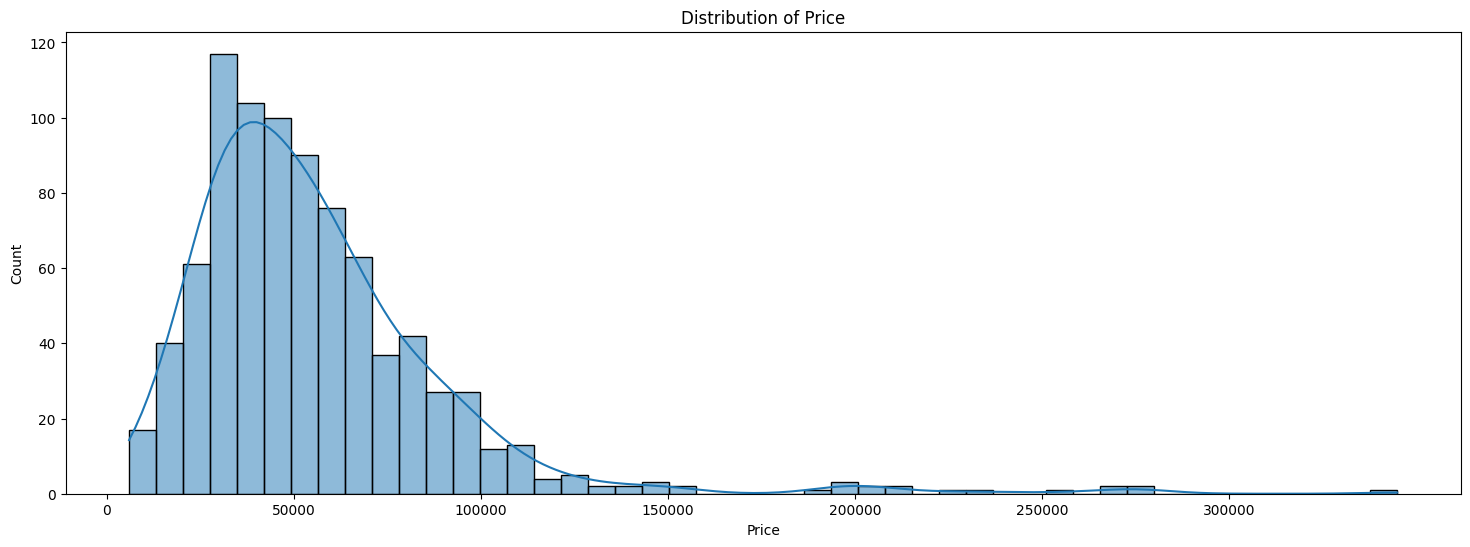

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns


# Chuyển đổi cột 'Price', 'Mileague' thành dạng số thực
data['Price'] = data['Price'].astype(float)
data['Mileague'] = data['Mileague'].astype(float)

# Tạo biểu đồ histogram và KDE
plt.figure(figsize=(18, 6))
sns.histplot(data=data, x="Price", kde=True)
plt.title("Distribution of Price")
plt.xticks(np.arange(0, data['Price'].max(), 50000))
plt.show()


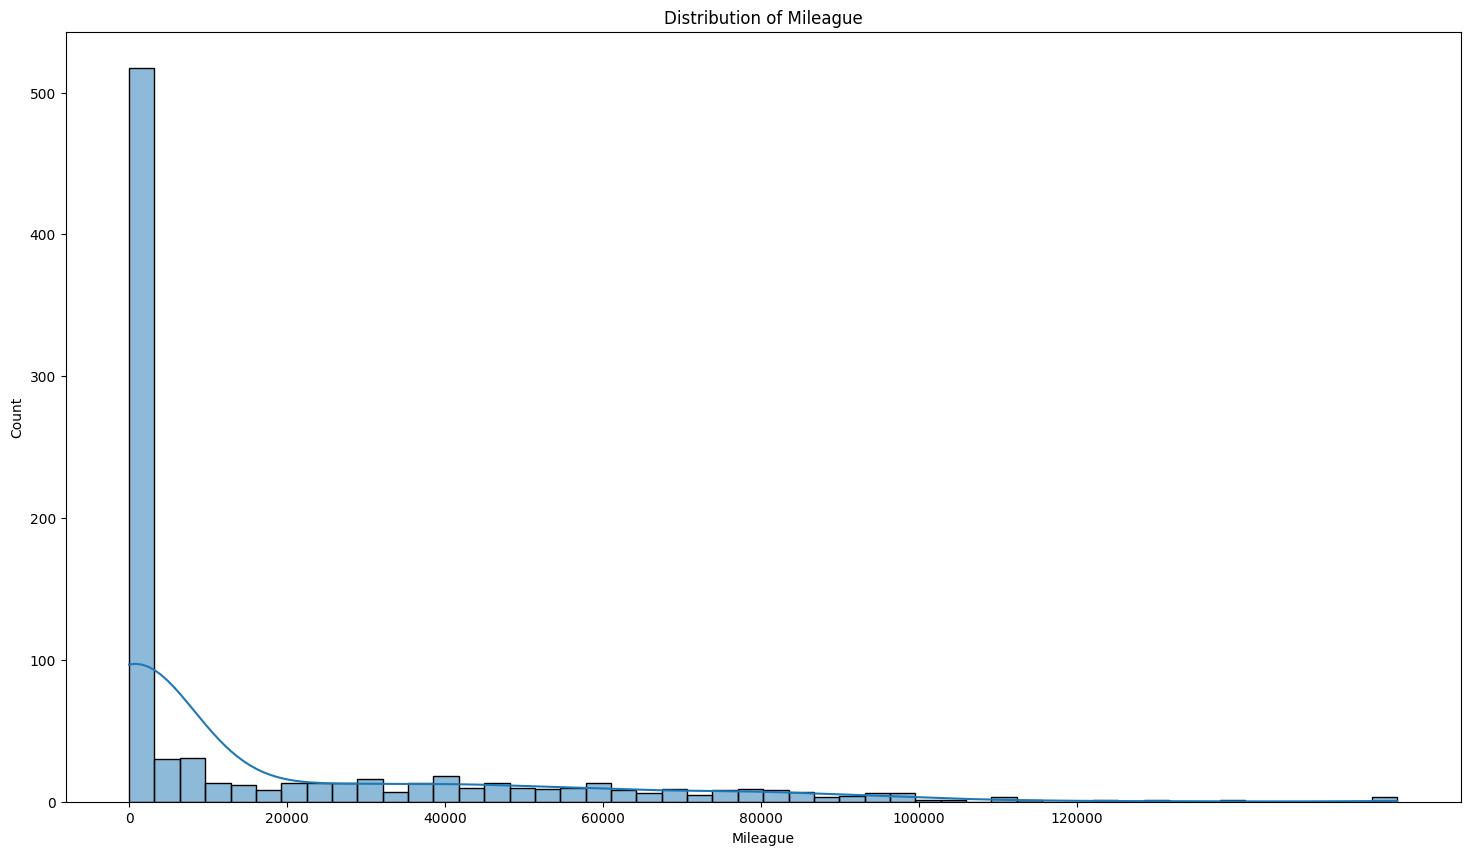

In [245]:
plt.figure(figsize=(18, 10))
sns.histplot(data=data, x="Mileague", kde=True, bins = 50)
plt.title("Distribution of Mileague")
plt.xticks(np.arange(0, 140000, 20000))

plt.show()

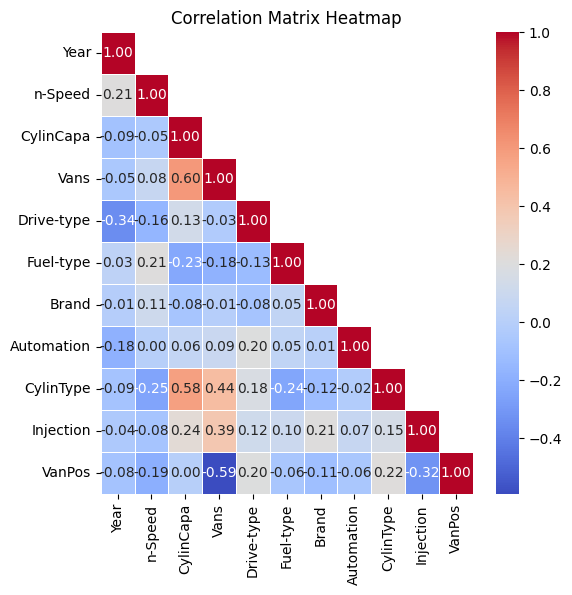

In [246]:
# Áp dụng Label Encoder lên các cột
columns = ['Year','n-Speed', 'CylinCapa', 'Vans','Drive-type', 'Fuel-type', 'Brand', 'Automation', 'CylinType', 'Injection', 'VanPos']
encoder = LabelEncoder()
for column in columns:
    data[column] = encoder.fit_transform(data[column])
    
data_subset = data[columns]

# Tính ma trận tương quan
correlation_matrix = data_subset.corr()

# Vẽ heatmap
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask = mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data Standardization

In [247]:
scaler = StandardScaler()

data['Price'] = scaler.fit_transform(data[['Price']])
data['Mileague'] = scaler.fit_transform(data[['Mileague']])

In [248]:
# Áp dụng Label Encoder lên các cột
columns_to_encode = ['CylinCapa', 'Brand', 'Year', 'Drive-type', 'Fuel-type', 'Automation', 'CylinType', 'Injection', 'VanPos', 'n-Speed', 'Vans']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [249]:
# # Áp dụng One-Hot Encoder lên các cột
# columns_to_encode = ['CylinCapa', 'Brand', 'Year']
# data = pd.get_dummies(data, columns=columns_to_encode)

## Linear Regression và Random Forest Regressor

In [250]:
X = data.drop('Price', axis=1)  # features
y = data['Price']  # target

In [251]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập đánh giá
y_val_pred = linear_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
print("MSE trên tập đánh giá:", mse_val)
print("RMSE trên tập đánh giá:", np.sqrt(mse_val))
print("MAE trên tập đánh giá:", mae_val)

# Tinh chỉnh tham số của Linear Regression bằng Grid Search
param_grid = {
    'fit_intercept': [True, False],  # Whether to fit the intercept or not
}

grid_search = GridSearchCV(linear_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_linear_model = grid_search.best_estimator_
print("Tham số tốt nhất của Linear Regression:", grid_search.best_params_)

# Đánh giá hiệu suất của mô hình tốt nhất trên tập kiểm tra
y_test_pred = best_linear_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("MSE trên tập kiểm tra:", mse_test)
print("RMSE trên tập kiểm tra:", np.sqrt(mse_test))
print("MAE trên tập kiểm tra:", mae_test)


print("\n")

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập đánh giá
y_val_pred = rf_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
print("MSE trên tập đánh giá:", mse_val)
print("RMSE trên tập đánh giá:", np.sqrt(mse_val))
print("MAE trên tập đánh giá:", mae_val)

# Tinh chỉnh tham số của Random Forest bằng Grid Search
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Tham số tốt nhất của Random Forest:", grid_search.best_params_)

# Đánh giá hiệu suất của mô hình tốt nhất trên tập kiểm tra
y_test_pred = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("MSE trên tập kiểm tra:", mse_test)
print("RMSE trên tập kiểm tra:", np.sqrt(mse_test))
print("MAE trên tập kiểm tra:", mae_test)


MSE trên tập đánh giá: 0.6869980817190612
RMSE trên tập đánh giá: 0.8288534742154738
MAE trên tập đánh giá: 0.5222915405614483
Tham số tốt nhất của Linear Regression: {'fit_intercept': True}
MSE trên tập kiểm tra: 0.5928723801156712
RMSE trên tập kiểm tra: 0.7699820648012986
MAE trên tập kiểm tra: 0.46849783272998685


MSE trên tập đánh giá: 0.20384597355840062
RMSE trên tập đánh giá: 0.45149304929134915
MAE trên tập đánh giá: 0.3015963416749616
Tham số tốt nhất của Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 300}
MSE trên tập kiểm tra: 0.29938838034517146
RMSE trên tập kiểm tra: 0.5471639428408742
MAE trên tập kiểm tra: 0.2851473419763941


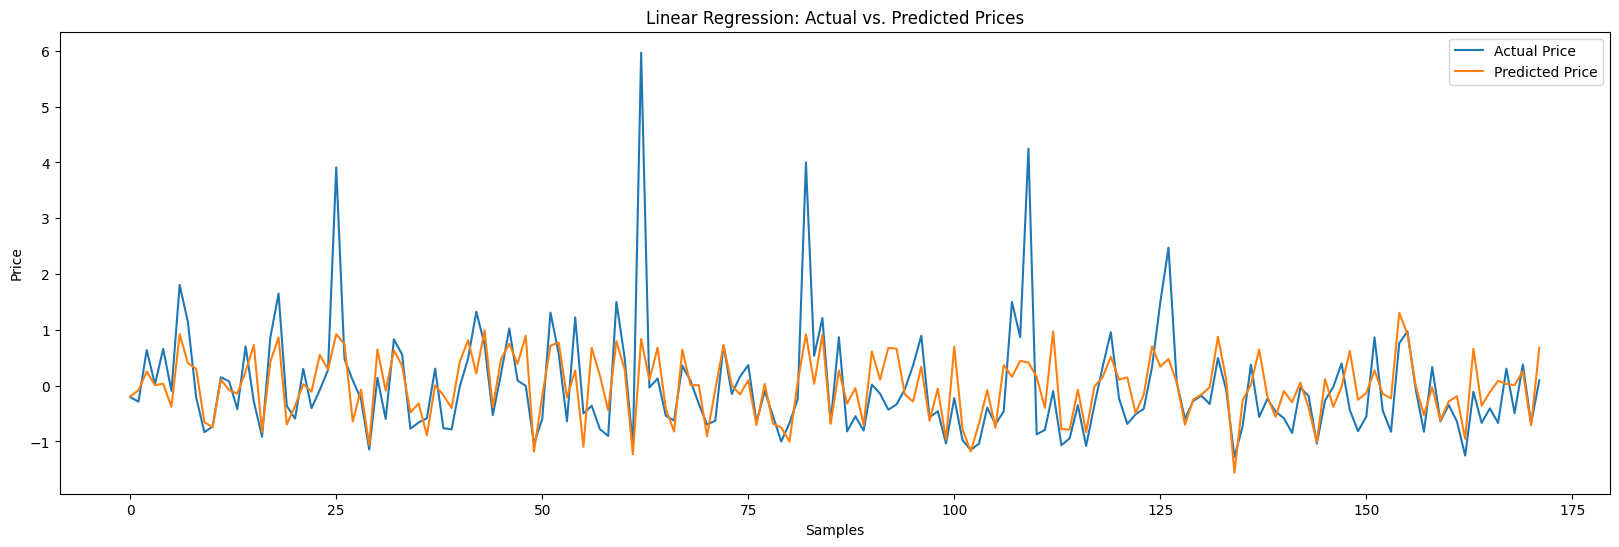

In [252]:
model = best_linear_model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Trực quan hóa kết quả dự đoán và kết quả thực
plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Price')
plt.plot(range(len(y_test)), y_pred, label='Predicted Price')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.legend()
plt.show()

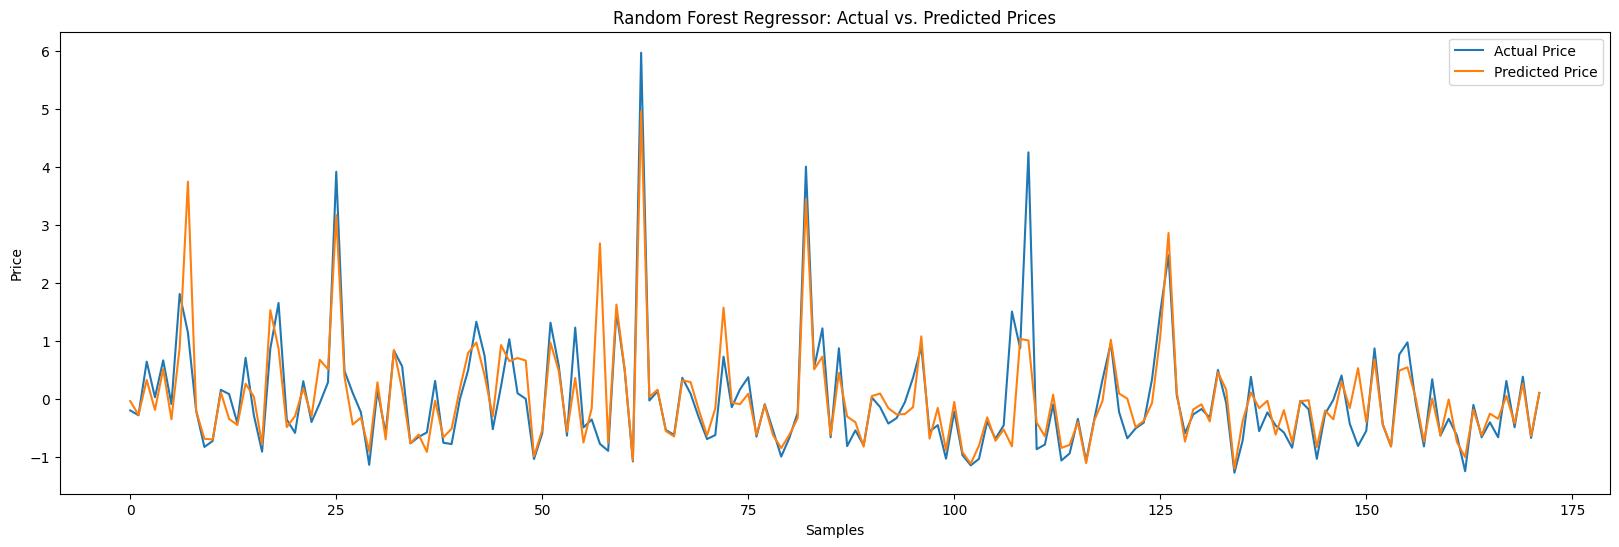

In [253]:
model = best_rf_model

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Trực quan hóa kết quả dự đoán và kết quả thực
plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Price')
plt.plot(range(len(y_test)), y_pred, label='Predicted Price')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.title('Random Forest Regressor: Actual vs. Predicted Prices')
plt.legend()
plt.show()